In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Let's read the data...
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#..and create a new data frame in case we want later on
# to work with the initial dataframe
train = train_data.copy()
test = test_data.copy()

In [4]:
#train.info()

In [5]:
# From the data_exploration_house_prices notebook we know
# that 'GrLivArea' has high correlation with our target variable
# 'SalePrice'. So let's use it to build a simple linear regression model.
columns = ['GrLivArea', 'SalePrice']
# Creating a new dataframe which contains only the target variable and
# the selected predictor variable
play_dataset = pd.DataFrame(train, columns=columns)
# Checking correlation once again:
play_dataset['GrLivArea'].corr(play_dataset['SalePrice'])

0.7086244776126523

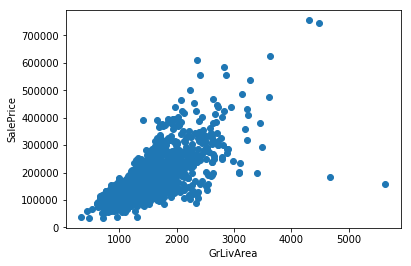

In [61]:
# Plotting the scatterplot of 
plt.scatter(play_dataset['GrLivArea'], play_dataset['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [40]:
# Let's select a small part of the dataset for educational purposes 
small_dataset = play_dataset[:20]

In [41]:
# Correlation still relatively high:
small_dataset['GrLivArea'].corr(small_dataset['SalePrice'])

0.6769087401125173

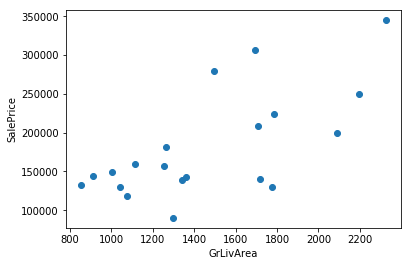

In [62]:
plt.scatter(small_dataset['GrLivArea'], small_dataset['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [63]:
# Lets fit a regression line to the above small dataset
from sklearn.linear_model import LinearRegression

In [44]:
#small_dataset['GrLivArea'].values.reshape(-1, 1)

In [45]:
#small_dataset['SalePrice'].shape

In [70]:
print(type(small_dataset['GrLivArea']))
print(type(small_dataset['SalePrice']))
X = small_dataset['GrLivArea'].values.reshape(-1, 1)
y = small_dataset['SalePrice'].values.reshape(-1, 1)
# We need to reshape here our variables because the fit method
# takes as input numpy arrays
# If we had use  the train_test_split() function 
# which may take as input lists, numpy arrays, scipy-sparse matrices or pandas dataframes 
# we would be fine:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(type(X_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


In [73]:
# But let's not use train_test_split() and just use all the data to fit our
# linear model.
# Creating the regressor lm which will apply the Ordinary least squares (OLS) 
# method in order to fit a linear regression line to our data. 
# our small_dataset smaples
lm = LinearRegression()
lm.fit(X, y)
# Printing the estimated coefficient for the X variable 
print(lm.coef_)
# Printing the intercept of the model
print(lm.intercept_)

[[107.15314929]]
[24290.63628644]


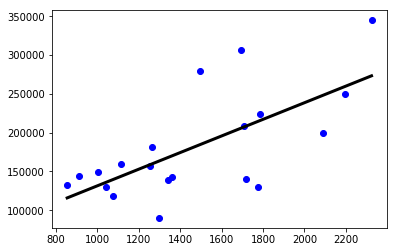

In [15]:
prediction_space = np.linspace(min(X), 
                               max(X)).reshape(-1, 1)
plt.scatter(X, y, color='blue') 
plt.plot(prediction_space, lm.predict(prediction_space), 
         color='black', linewidth=3) 
plt.show()